In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import yfinance as yfin

In [111]:
yfin.pdr_override()
df = pdr.get_data_yahoo('AAPL', start='2010-01-01', end='2022-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496294  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507526  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404016  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392175  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434673  447610800

In [112]:
df.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674019   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.552719   

              Volume  
Date                  
2022-12-23  63814900  
2022-12-27  69007800  
2022-12-28  85438400  
2022-12-29  75703700  
2022-12-30  77034200

In [22]:
df=df.reset_index()
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496296  493729600
1 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507527  601904800
2 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404016  552160000
3 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392177  477131200
4 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434673  447610800

In [23]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

Open      High       Low     Close     Volume
0  7.622500  7.660714  7.585000  7.643214  493729600
1  7.664286  7.699643  7.616071  7.656429  601904800
2  7.656429  7.686786  7.526786  7.534643  552160000
3  7.562500  7.571429  7.466071  7.520714  477131200
4  7.510714  7.571429  7.466429  7.570714  447610800

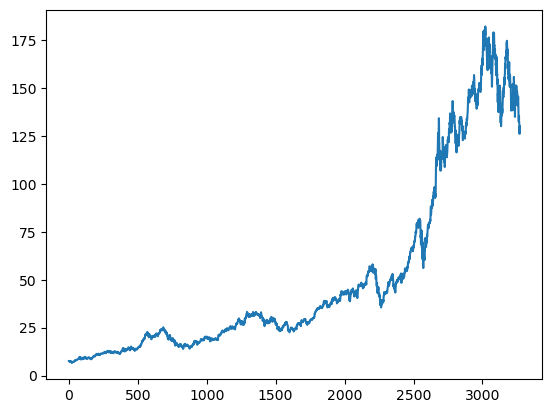

In [27]:
plt.plot(df.Close)

In [28]:
df

Open        High         Low       Close     Volume
0       7.622500    7.660714    7.585000    7.643214  493729600
1       7.664286    7.699643    7.616071    7.656429  601904800
2       7.656429    7.686786    7.526786    7.534643  552160000
3       7.562500    7.571429    7.466071    7.520714  477131200
4       7.510714    7.571429    7.466429    7.570714  447610800
...          ...         ...         ...         ...        ...
3267  130.919998  132.419998  129.639999  131.860001   63814900
3268  131.380005  131.410004  128.720001  130.029999   69007800
3269  129.669998  131.029999  125.870003  126.040001   85438400
3270  127.989998  130.479996  127.730003  129.610001   75703700
3271  128.410004  129.949997  127.430000  129.929993   77034200

[3272 rows x 5 columns]

In [29]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

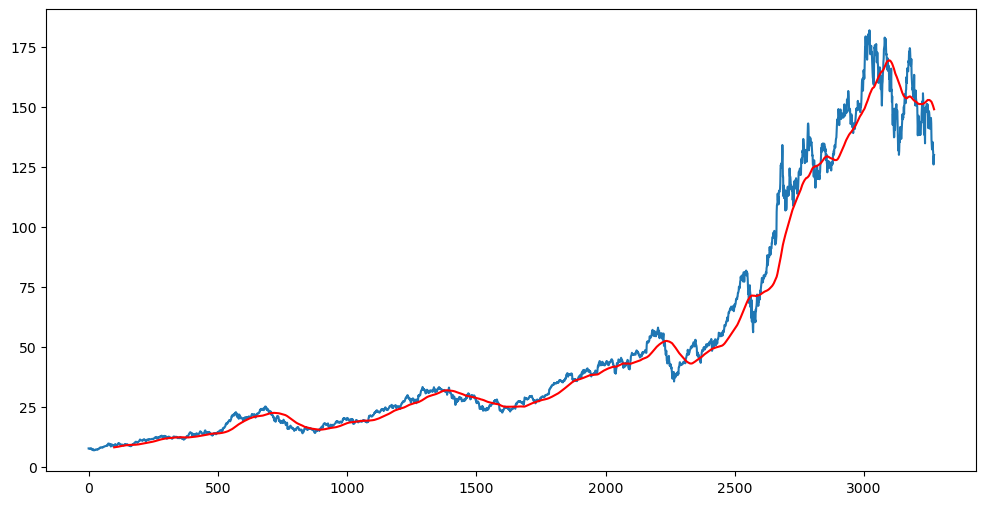

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [31]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

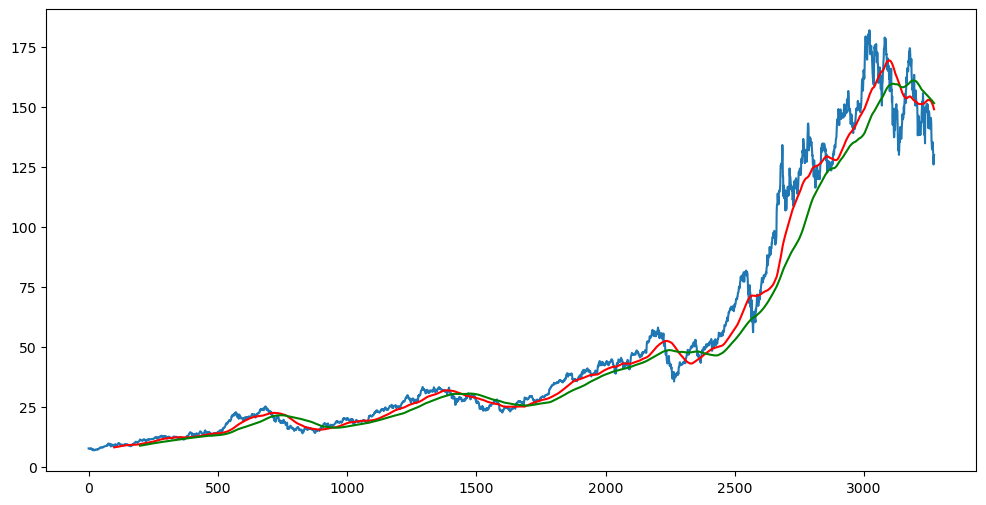

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [33]:
df.shape

(3272, 5)

In [34]:
#Splitiing data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [35]:
data_training.head()

Close
0  7.643214
1  7.656429
2  7.534643
3  7.520714
4  7.570714

In [36]:
data_testing.head()

Close
2290  42.602501
2291  42.357498
2292  42.722500
2293  42.544998
2294  42.700001

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [60]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#ML MODEL

In [61]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [62]:
model = Sequential()

model.add(LSTM(units=50 , activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 30s 336ms/step - loss: 0.0214
Epoch 2/50
69/69 [==============================] - 53s 768ms/step - loss: 0.0067
Epoch 3/50
69/69 [==============================] - 58s 845ms/step - loss: 0.0070
Epoch 4/50
69/69 [==============================] - 56s 805ms/step - loss: 0.0057
Epoch 5/50
69/69 [==============================] - 68s 985ms/step - loss: 0.0049
Epoch 6/50
69/69 [==============================] - 60s 871ms/step - loss: 0.0048
Epoch 7/50
69/69 [==============================] - 31s 444ms/step - loss: 0.0043
Epoch 8/50
69/69 [==============================] - 23s 334ms/step - loss: 0.0054
Epoch 9/50
69/69 [==============================] - 34s 489ms/step - loss: 0.0038
Epoch 10/50
69/69 [==============================] - 25s 365ms/step - loss: 0.0034
Epoch 11/50
69/69 [==============================] - 24s 342ms/step - loss: 0.0033
Epoch 12/50
69/69 [==============================] - 26s 372ms/step - loss: 0.0044
Epoch 13/50
6

model.fit(x_train,y_train,epochs=50)

In [65]:
model.save('keras_model.h5')

In [76]:
data_testing

Close
2290   42.602501
2291   42.357498
2292   42.722500
2293   42.544998
2294   42.700001
...          ...
3267  131.860001
3268  130.029999
3269  126.040001
3270  129.610001
3271  129.929993

[982 rows x 1 columns]

In [67]:
past_100_days = data_training.tail(100)

In [74]:
final_df = pd.concat([past_100_days,data_testing])

In [75]:
final_df

Close
2190   55.959999
2191   54.470001
2192   54.560001
2193   54.592499
2194   55.007500
...          ...
3267  131.860001
3268  130.029999
3269  126.040001
3270  129.610001
3271  129.929993

[1082 rows x 1 columns]

In [77]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [78]:
input_data.shape

(1082, 1)

In [79]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [80]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [82]:
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [84]:
# Making Prediction

y_predicted = model.predict(x_test)

31/31 [==============================] - 9s 180ms/step


In [85]:
y_predicted.shape

(982, 1)

In [87]:
y_test.shape

(982,)

In [88]:
scaler.scale_

array([0.00682769])

In [89]:
scale_factor = 1/0.00682769
y_predicted = y_predicted*scale_factor
y_test = y_test* scale_factor

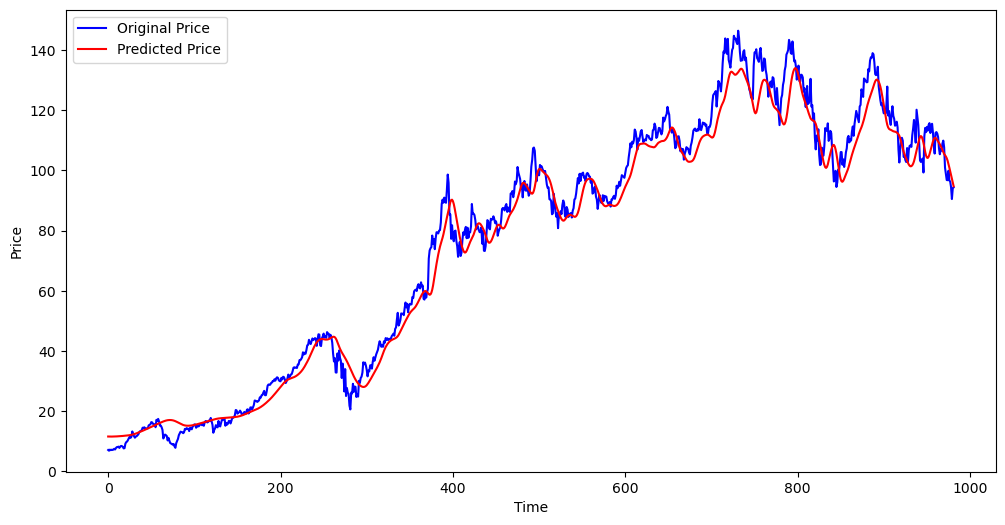

In [91]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()